In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
candidates=pd.read_csv("candidates_counties.csv")

In [3]:
candidates.head()

,Filer ID,Name,Office,Subdivision,Municipality,District,County
0,C26640,11TH WARD DEMOCRATIC COMMITTEE,NaN,County,Albany,NaN,Albany County
1,C34110,21 ST CENTURY DEMOCRATS POLITICAL ACTION COMMI...,NaN,County,Albany,NaN,Albany County
2,C01217,21ST CENTURY ALBANY PAC,NaN,County,Albany,NaN,Albany County
3,C01147,4TH WARD DEMOCRATIC COMMITTEE,Common Council,City,Albany,4.0,Albany County
4,C00676,8TH WARD DEMOCRATIC COMMITTEE,NaN,City,Albany,NaN,Albany County


In [4]:
sel=(candidates["Municipality"]=="Rochester City")&((candidates["Office"]=="City Council")|(candidates["Office"]=="Councilman at Large") )

In [5]:
candidates[sel]

,Filer ID,Name,Office,Subdivision,Municipality,District,County
8979,C07603,A FRIEND OF WILLIE J. LIGHTFOOT,Councilman at Large,City,Rochester City,NaN,Monroe County
8987,C35229,ADAM MCFADDEN,City Council,City,Rochester City,NaN,Monroe County
8989,C86306,ALEXANDER J. WHITE,City Council,City,Rochester City,NaN,Monroe County
9000,C84744,ANDREAS MICHAEL RAU,City Council,City,Rochester City,NaN,Monroe County
9002,C07958,ANDREW C HOLLISTER,Councilman at Large,City,Rochester City,NaN,Monroe County
9015,C33813,ANTHONY ANDERSON,City Council,City,Rochester City,NaN,Monroe County
9016,C34122,ANTHONY GIORDANO,City Council,City,Rochester City,NaN,Monroe County
9023,C06815,BARNEY J. RADFORD JR.,City Council,City,Rochester City,NaN,Monroe County
9024,C06814,BARNEY RADFORD FOR CITY COUNCIL,City Council,City,Rochester City,NaN,Monroe County
9026,C20516,BENJAMIN L. DOUGLAS,City Council,City,Rochester City,NaN,Monroe County


In [6]:
reports=pd.read_csv("select_reports_2.csv",parse_dates=["date1"])

In [7]:
e2017=(reports["e_year"]==2017)

In [8]:
individual=(reports["transaction_code"]=="A")

In [9]:
ind2017=reports[e2017&individual].groupby("filer_id")["amount"].sum()

In [10]:
business=(reports["transaction_code"]=="B")

In [11]:
bus2017=reports[e2017&business].groupby("filer_id")["amount"].sum()

In [12]:
others=(reports["transaction_code"]=="C")

In [13]:
others2017=reports[e2017&others].groupby("filer_id")["amount"].sum()

In [14]:
all_contributions_2017=ind2017.to_frame("individual").join(bus2017.to_frame("business"),how="outer").join(others2017.to_frame("other"),how="outer").fillna(0)

In [15]:
all_contributions_2017

,individual,business,other
filer_id,,,
C03538,7675.00,4725.0,7258.00
C03754,9672.98,3700.0,2100.00
C06302,31908.35,0.0,2725.00
C06665,9710.00,725.0,13996.00
C06751,36213.00,1200.0,4050.00
C06965,13049.12,800.0,1250.00
C07401,1505.46,0.0,25.00
C07436,8712.00,100.0,7600.00
C07603,4793.00,0.0,7300.00


In [16]:
all_names_contributions_2017=candidates[["Filer ID","Name"]].join(all_contributions_2017,how="right",on="Filer ID")

In [17]:
all_names_contributions_2017["total"]=all_names_contributions_2017[["individual","business","other"]].sum(axis=1)

In [18]:
all_names_contributions_2017.sort_values(by="total",ascending=False)

,Filer ID,Name,individual,business,other,total
9590,C06751,FRIENDS OF MITCH GRUBER,36213.00,1200.0,4050.00,41463.00
9477,C49157,FRIENDS OF JACKIE ORTIZ,9439.00,2400.0,26892.00,38731.00
9563,C06302,FRIENDS OF MARY LUPIEN,31908.35,0.0,2725.00,34633.35
9548,C30524,FRIENDS OF LORETTA SCOTT,13140.00,1200.0,12184.00,26524.00
9567,C06665,FRIENDS OF MATT JUDA,9710.00,725.0,13996.00,24431.00
9594,C03538,FRIENDS OF MOLLY CLIFFORD,7675.00,4725.0,7258.00,19658.00
9190,C07436,COMMITTEE TO ELECT MALIK EVANS,8712.00,100.0,7600.00,16412.00
9393,C03754,FRIENDS OF ANDREW C HOLLISTER,9672.98,3700.0,2100.00,15472.98
9636,C06965,FRIENDS OF SHAWN DUNWOODY,13049.12,800.0,1250.00,15099.12
8979,C07603,A FRIEND OF WILLIE J. LIGHTFOOT,4793.00,0.0,7300.00,12093.00


# Campaign contributions for candidates in the Rochester city council race 2017

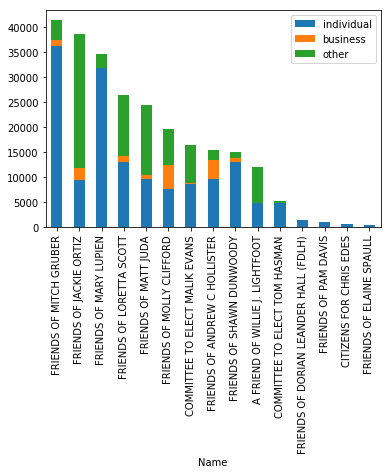

In [19]:
all_names_contributions_2017.sort_values(by="total",ascending=False).plot.bar(y=["individual","business","other"],stacked=True,x="Name")

In [20]:
gruber2017=reports[reports["filer_id"]=="C06751"]

In [21]:
codes=["A","B","C"]
types={"A":"individuals","B":"businesses","C":"others"}
small_threshold=50

In [22]:
split_up=[("%s / %s"%(["small","big"][int(s==1)],types[c]),
  gruber2017["amount"][(gruber2017["transaction_code"]==c)&(s*(gruber2017["amount"]-small_threshold-.0001)>0)].sum())
 for c in codes for s in [-1,1]]

In [23]:
gruber_contrib_2017=pd.DataFrame(split_up,columns=["type","amount"])

# Big vs. Small donors for the three categories of contributions for Mitch Gruber in 2017

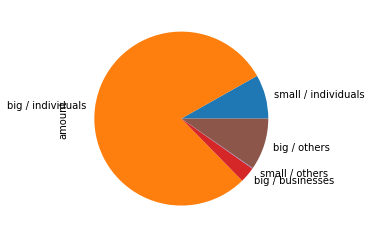

In [24]:
gruber_contrib_2017.plot.pie(y="amount",labels=gruber_contrib_2017["type"],legend=False)